The Clustering lab created a k-means cluster using three features: boosts, matchkillrank, and walkdistance

At the end of the lab you were asked to create your own clustering example using at least 5 features.

Create an ipython notebook whose name begins with YourWSUID_Clustering_Lab-01. Explore the pubg dataset. Identify 5 features you find (mildly) interesting, and create a k-means clustering using these features. Visualize the data by reducing to 2 dimensions with PCA.

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [75]:
pubg_df = pd.read_csv("pubg_dataset- Sheet.csv")

## EDA and Data Preprocessing

In [76]:
pubg_df.head()

,Groupid,Id,Matchid,Matchtype,Assists,Boosts,Damagedealt,Headshotkills,Heals,Is Duo,Is Squad,Kills,Killstreaks,Longestkill,Matchduration,Matchkillrank,Matchtypeint,Maxplace,Numenemiesknocked,Numgroups,Overallkillrank,Overallwinbasedrank,Revives,Ridedistance,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc,Ln Win Place Perc.1
0,32dc8ae9572956,4bda15647cb16c,b262d5270ee227,solo,0,0,53.32,0,0,0,0,0,0,0.000,"1,208",53,1,97,0,94,"1,494","1,519",0,0.0,0.0,0,0,603.6,3,0.6354,3.976311,3.970292,-0.453501,-0.453501
1,559ec1194e4a7d,bc952a1b1e62d7,4b8d740dda9ca9,squad,1,3,427.5,0,1,0,1,3,1,181.800,"1,871",11,3,27,2,27,"1,400","1,512",0,5479.0,0.0,0,0,2716.0,6,0.9615,6.057954,2.397895,-0.039261,-0.039261
2,7d4155b927c232,eb1cc8c533c91f,a3cb2f821cebee,duo,0,3,393.1,1,5,1,0,3,1,29.670,"1,327",12,2,48,1,46,0,0,1,756.8,0.0,0,0,2107.0,3,0.8511,5.974064,2.484907,-0.161226,-0.161226
3,8e4fcc73aa9046,3d621777a0b77f,9e9a7fc4f76c37,squad,0,0,142.9,1,0,0,1,2,1,21.610,"1,921",25,3,27,2,26,0,0,0,0.0,0.0,0,0,161.3,2,0.0769,4.962145,3.218876,-2.565249,-2.565249
4,7f802b015bf341,5ab218d8cd339f,760c1a85499e78,duo,0,0,61.64,0,3,1,0,1,1,2.046,"1,873",28,2,49,1,47,0,0,0,0.0,0.0,1,0,455.8,4,0.3125,4.121311,3.332205,-1.163151,-1.163151


In [77]:
pubg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Groupid              5000 non-null   object 
 1   Id                   5000 non-null   object 
 2   Matchid              5000 non-null   object 
 3   Matchtype            5000 non-null   object 
 4   Assists              5000 non-null   int64  
 5   Boosts               5000 non-null   int64  
 6   Damagedealt          5000 non-null   object 
 7   Headshotkills        5000 non-null   int64  
 8   Heals                5000 non-null   int64  
 9   Is Duo               5000 non-null   int64  
 10  Is Squad             5000 non-null   int64  
 11  Kills                5000 non-null   int64  
 12  Killstreaks          5000 non-null   int64  
 13  Longestkill          5000 non-null   float64
 14  Matchduration        5000 non-null   object 
 15  Matchkillrank        5000 non-null   i

Here last 2 columns contain same records. Those fields are: 
- Ln Win Place Perc
- Ln Win Place Perc.1

So, We are dropping **Ln Win Place Perc.1** column from dataframe.

In [78]:
pubg_df = pubg_df.drop(columns=["Ln Win Place Perc.1"])

In [79]:
#duplicate detection
pubg_df.duplicated().sum()

# No duplicate records

0

In [80]:
pubg_df.isna().sum()

Groupid                0
Id                     0
Matchid                0
Matchtype              0
Assists                0
Boosts                 0
Damagedealt            0
Headshotkills          0
Heals                  0
Is Duo                 0
Is Squad               0
Kills                  0
Killstreaks            0
Longestkill            0
Matchduration          0
Matchkillrank          0
Matchtypeint           0
Maxplace               0
Numenemiesknocked      0
Numgroups              0
Overallkillrank        0
Overallwinbasedrank    0
Revives                0
Ridedistance           0
Swimdistance           0
Teamkills              0
Vehicledestroys        0
Walkdistance           0
Weaponsacquired        0
Winplaceperc           0
Ln Damage Dealt        0
Ln Match Kill Rank     0
Ln Win Place Perc      0
dtype: int64

In [81]:
pubg_df.describe()

,Assists,Boosts,Headshotkills,Heals,Is Duo,Is Squad,Kills,Killstreaks,Longestkill,Matchkillrank,Matchtypeint,Maxplace,Numenemiesknocked,Numgroups,Revives,Ridedistance,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.326200,1.431200,0.331200,1.794600,0.304000,0.537800,1.321400,0.766600,32.499768,37.865600,2.384400,44.39480,0.905800,42.963800,0.216200,719.179654,4.662469,0.017400,0.009000,1386.913008,4.136000,0.544779,4.803310,3.298700,-0.846153
std,0.688976,1.859021,0.729392,3.044317,0.460029,0.498619,1.770404,0.745544,57.374340,24.936646,0.746959,23.54296,1.271082,23.023886,0.524893,1637.849895,29.445735,0.138207,0.098595,1236.688793,2.388691,0.292414,0.986410,0.978038,0.822131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.00000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010200,-1.935861,0.000000,-4.585368
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,2.000000,28.00000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,276.200000,2.000000,0.296300,4.258870,2.833213,-1.216383
50%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,7.688000,34.000000,3.000000,30.00000,1.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1102.000000,4.000000,0.553200,4.834693,3.526361,-0.592036
75%,0.000000,2.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,38.365000,56.000000,3.000000,49.00000,1.000000,47.000000,0.000000,412.250000,0.000000,0.000000,0.000000,2277.250000,5.000000,0.807700,5.486558,4.025352,-0.213565
max,7.000000,13.000000,13.000000,44.000000,1.000000,1.000000,22.000000,7.000000,545.500000,98.000000,5.000000,100.00000,18.000000,100.000000,5.000000,15900.000000,629.900000,2.000000,2.000000,12220.000000,42.000000,1.000000,7.502186,4.584967,0.000000


In [82]:
correlation_matrix = pubg_df.corr(method= "pearson", numeric_only= True)
correlation_matrix

,Assists,Boosts,Headshotkills,Heals,Is Duo,Is Squad,Kills,Killstreaks,Longestkill,Matchkillrank,Matchtypeint,Maxplace,Numenemiesknocked,Numgroups,Revives,Ridedistance,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc
Assists,1.000000,0.269680,0.162335,0.214398,-0.052274,0.155385,0.249409,0.163438,0.217517,-0.216422,0.175321,-0.185579,0.262147,-0.185488,0.152878,0.090947,0.021987,0.028614,0.051007,0.282255,0.235342,0.288367,0.267061,-0.248139,0.232468
Boosts,0.269680,1.000000,0.290618,0.483637,-0.026765,0.009172,0.449350,0.318424,0.374945,-0.503573,-0.003424,0.007865,0.281829,0.008469,0.213588,0.312627,0.095311,0.026071,0.094510,0.607072,0.380238,0.632430,0.407822,-0.554041,0.519200
Headshotkills,0.162335,0.290618,1.000000,0.169378,-0.010984,-0.014079,0.685291,0.495695,0.419668,-0.458252,-0.028480,0.014669,0.454617,0.011375,0.121728,0.048444,0.048381,0.079744,0.058682,0.217380,0.222715,0.252077,0.456249,-0.594141,0.208035
Heals,0.214398,0.483637,0.169378,1.000000,-0.034251,0.066592,0.254281,0.198949,0.215808,-0.323995,0.072467,-0.063964,0.193872,-0.063610,0.209316,0.274153,0.086555,0.043203,0.064142,0.412901,0.269107,0.414269,0.235094,-0.322966,0.356451
Is Duo,-0.052274,-0.026765,-0.010984,-0.034251,1.000000,-0.712898,0.000607,0.020279,-0.018217,0.000580,-0.340143,0.087805,-0.019437,0.080023,-0.011287,-0.004732,-0.012708,0.017468,-0.016230,-0.056108,-0.025253,0.010221,0.004864,0.000951,0.024568
Is Squad,0.155385,0.009172,-0.014079,0.066592,-0.712898,1.000000,-0.029288,0.000868,0.013142,0.028692,0.889079,-0.750124,0.243129,-0.743356,0.138830,0.026578,0.003992,0.000614,0.003251,0.097318,-0.002302,-0.050157,-0.001108,0.025184,-0.063126
Kills,0.249409,0.449350,0.685291,0.254281,0.000607,-0.029288,1.000000,0.776429,0.547060,-0.731361,-0.039289,0.022468,0.654558,0.019474,0.196874,0.089175,0.032719,0.076064,0.114071,0.321380,0.305217,0.381756,0.681706,-0.913290,0.313658
Killstreaks,0.163438,0.318424,0.495695,0.198949,0.020279,0.000868,0.776429,1.000000,0.453216,-0.809784,0.011349,-0.025657,0.575871,-0.027634,0.190315,0.055026,0.029926,0.080191,0.061239,0.239020,0.202605,0.296680,0.635134,-0.795096,0.265394
Longestkill,0.217517,0.374945,0.419668,0.215808,-0.018217,0.013142,0.547060,0.453216,1.000000,-0.526471,0.002873,-0.004685,0.412674,-0.006202,0.128151,0.190684,0.042057,0.043735,0.104217,0.400682,0.242255,0.410288,0.439068,-0.590838,0.336573
Matchkillrank,-0.216422,-0.503573,-0.458252,-0.323995,0.000580,0.028692,-0.731361,-0.809784,-0.526471,1.000000,0.038053,-0.027024,-0.505168,-0.024412,-0.226337,-0.196764,-0.068310,-0.067464,-0.091692,-0.500787,-0.386911,-0.632377,-0.662872,0.883141,-0.602144


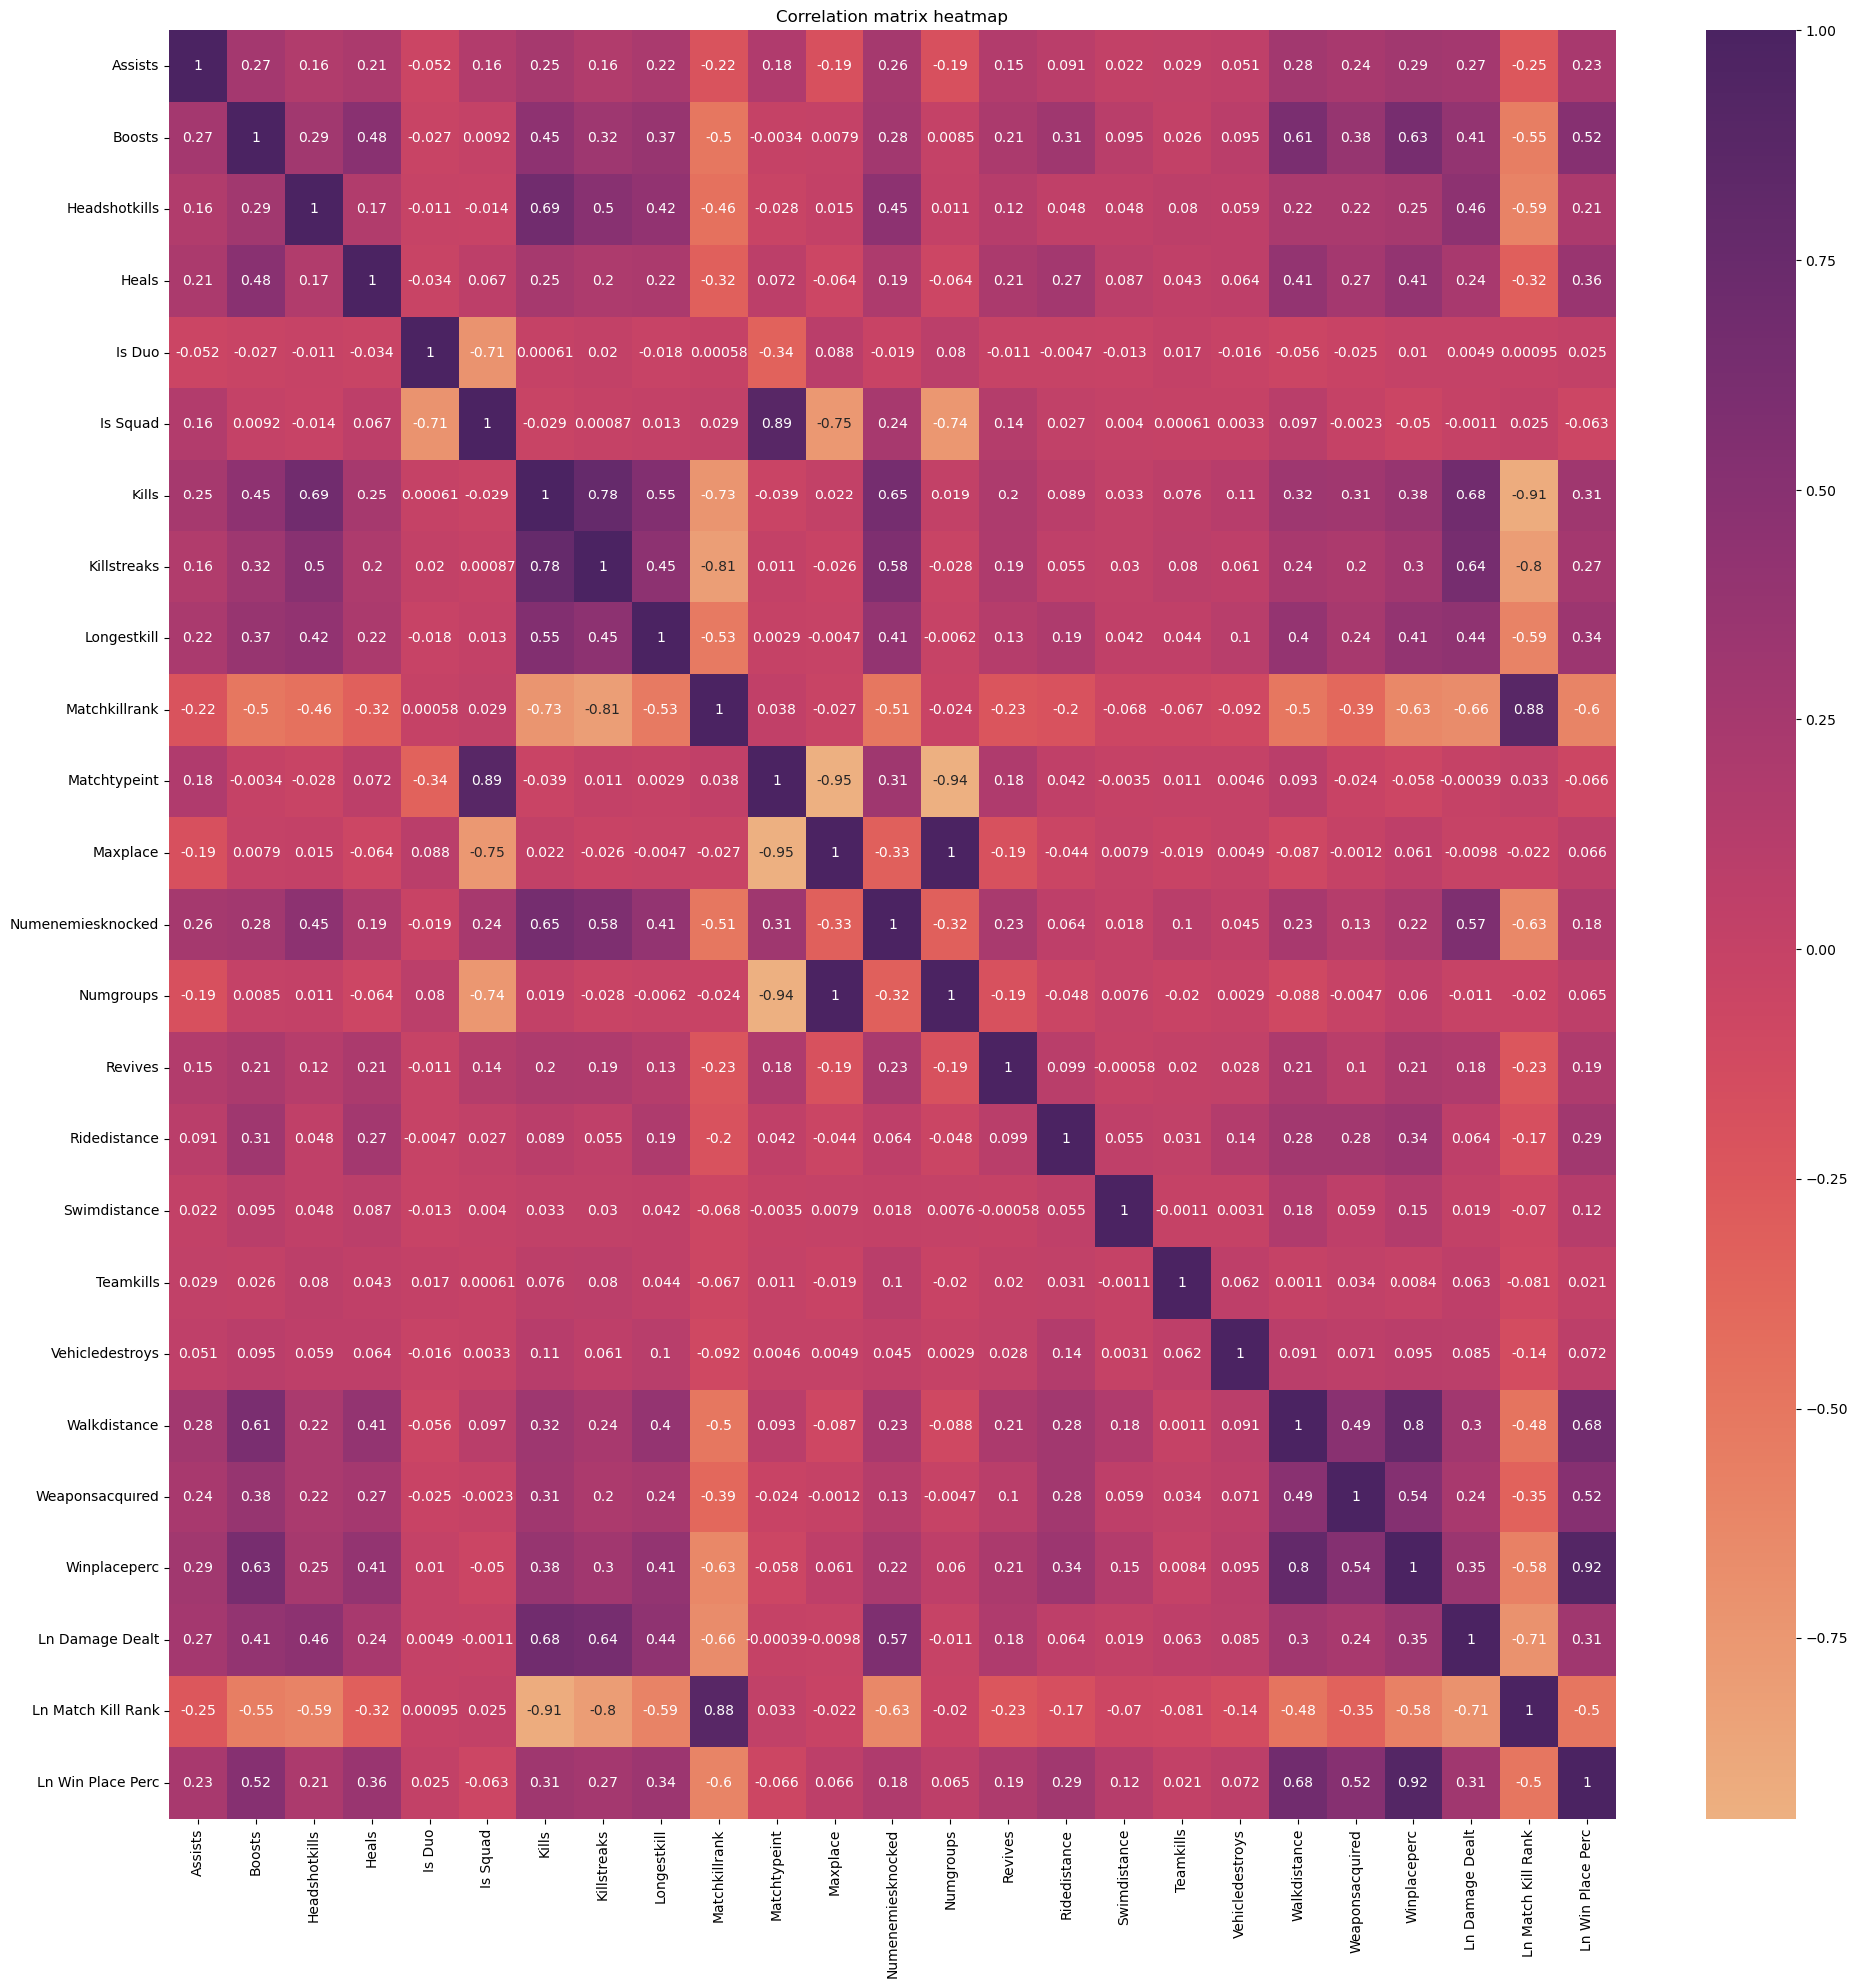

In [83]:
plt.figure(figsize= (20, 20))
sns.heatmap(data= correlation_matrix, annot= True, cmap= "flare")
plt.title("Correlation matrix heatmap")
plt.tight_layout()
plt.show()

In [84]:
numeric_df = pubg_df.select_dtypes('number')
print(f"Number of numeric columns: {len(numeric_df.columns)}")

Number of numeric columns: 25


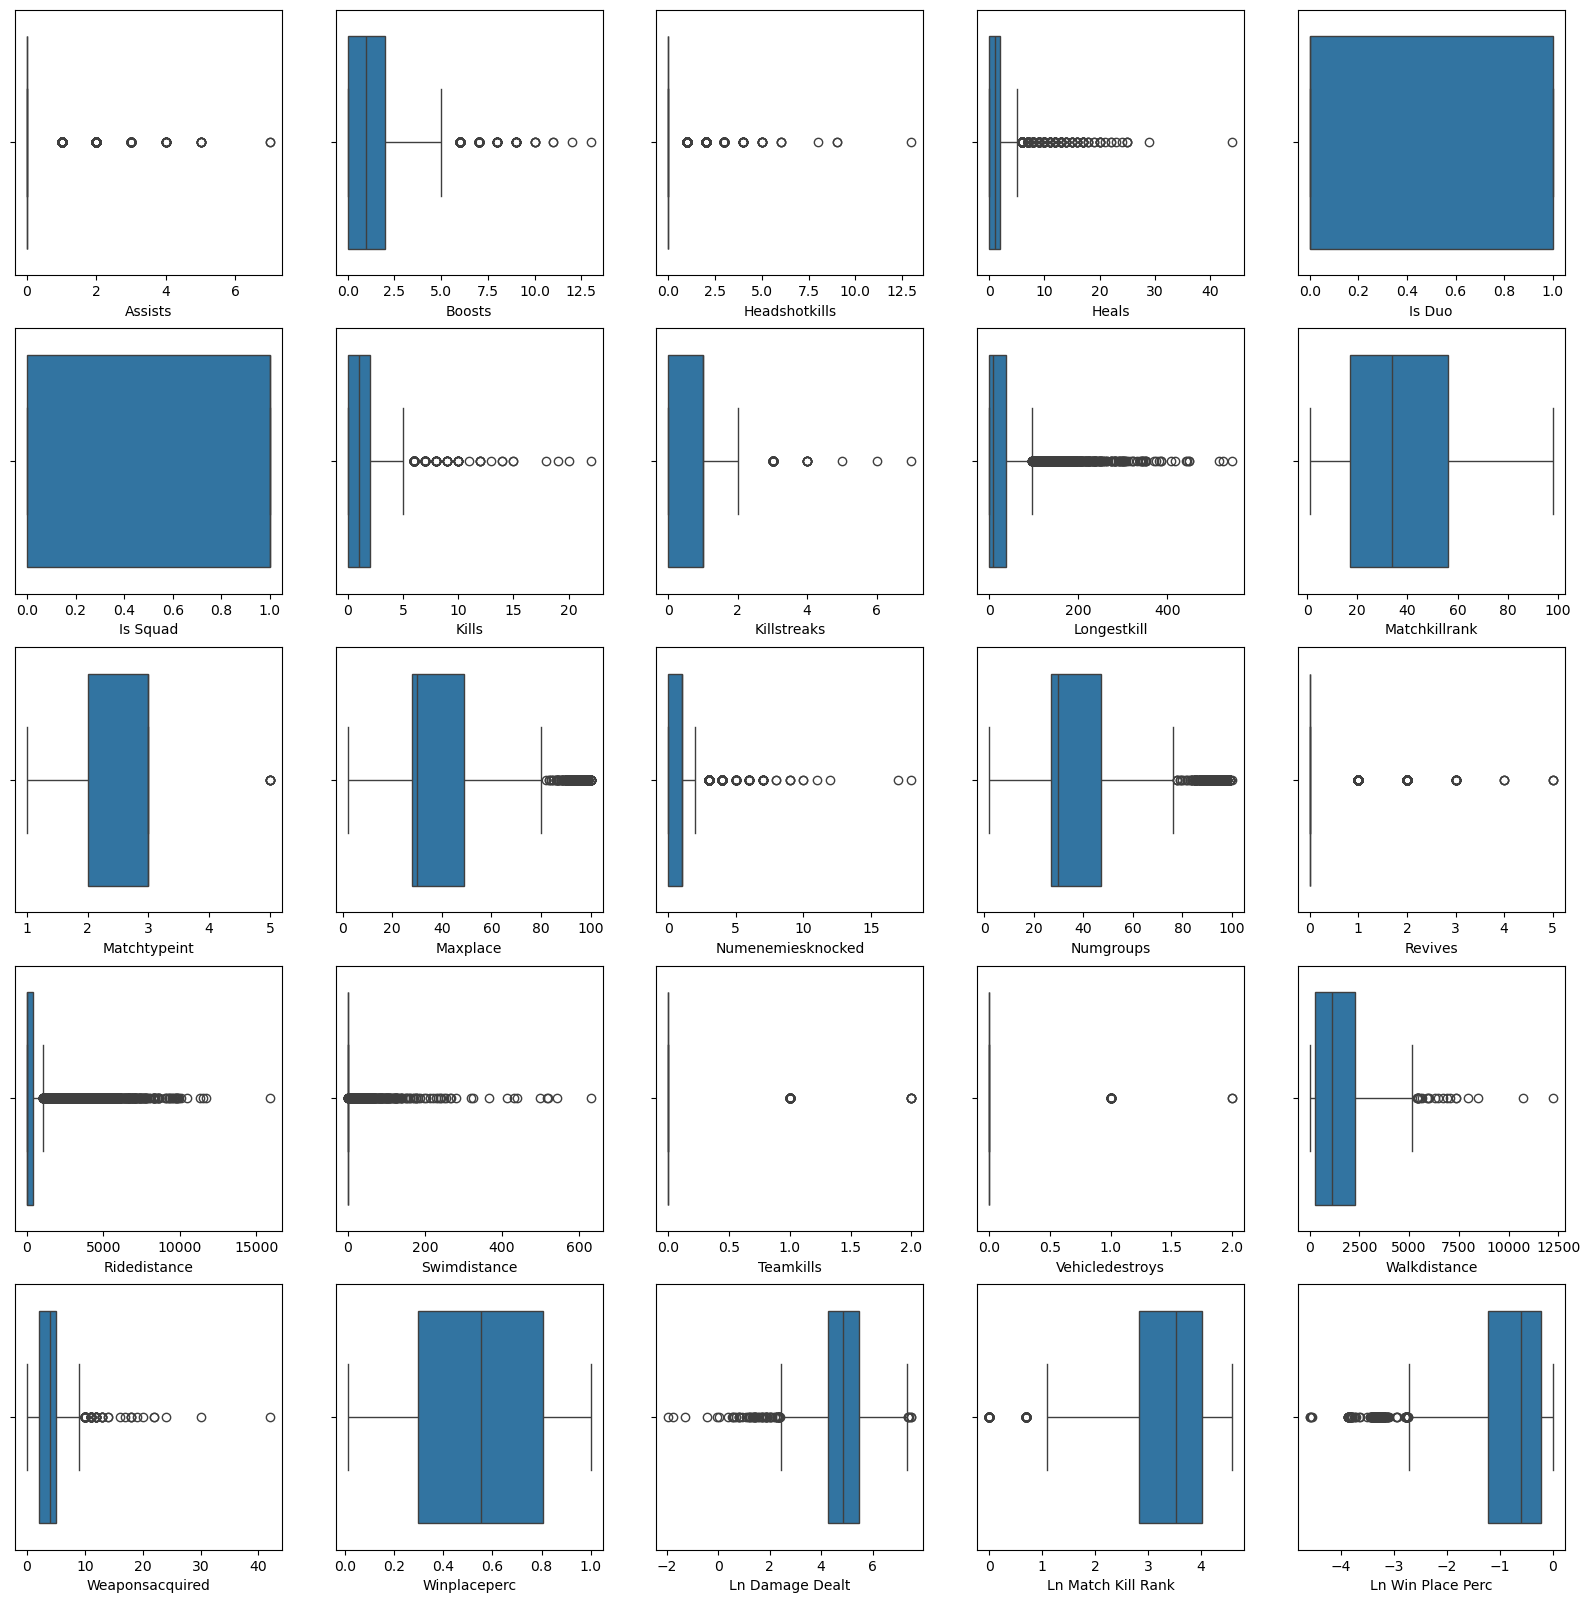

In [85]:
fig, axs = plt.subplots(5,5, figsize= (20, 20))
axs = axs.flatten()

for i, column_name in enumerate(numeric_df.columns):
    sns.boxplot(data= numeric_df, x= column_name, ax= axs[i])
plt.show()

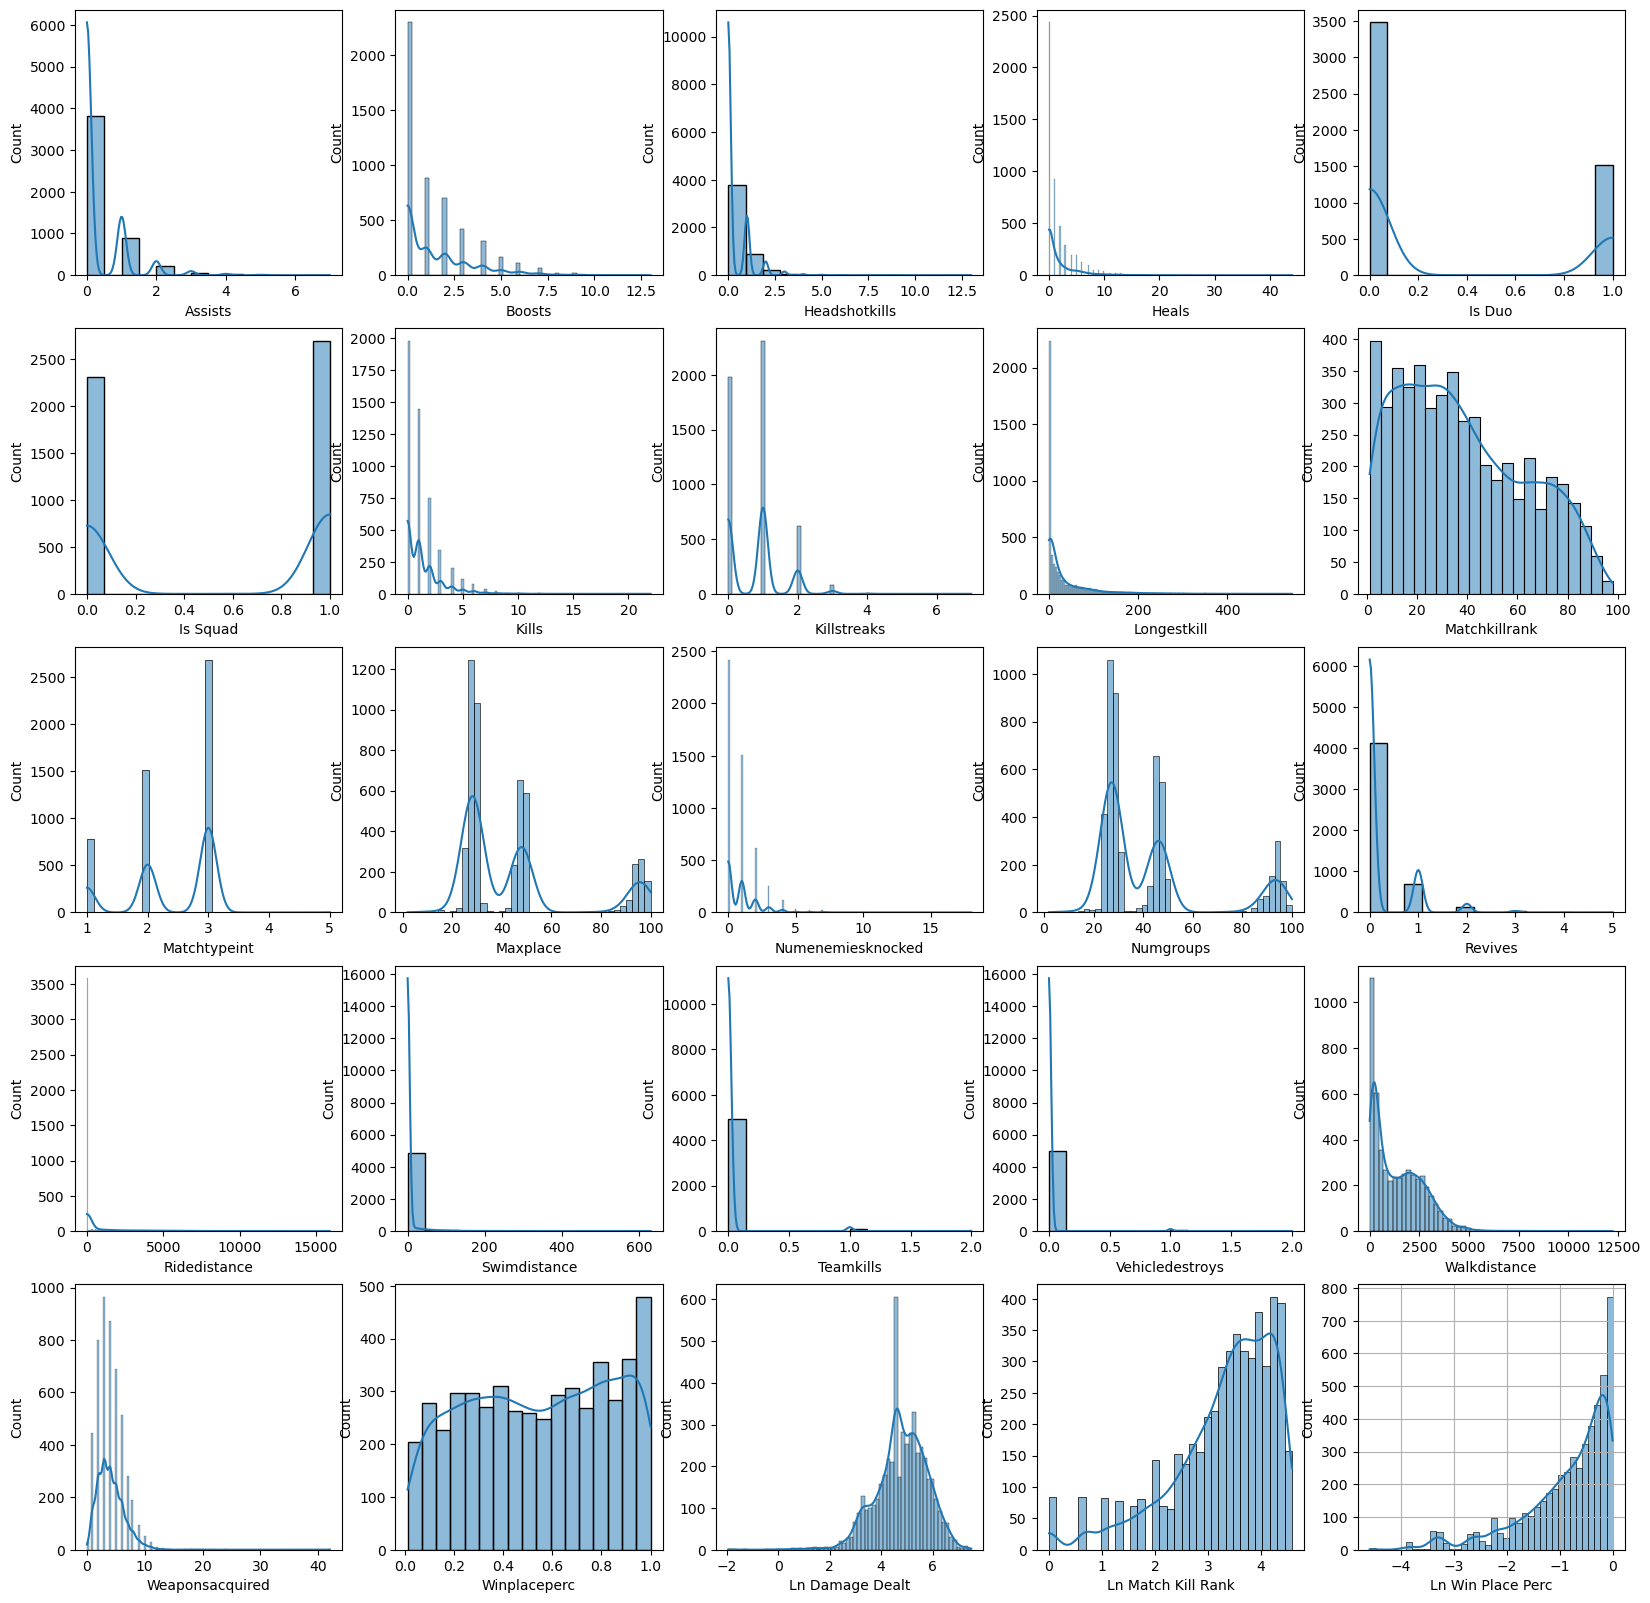

In [86]:
fig, axs = plt.subplots(5,5, figsize= (20, 20))
axs = axs.flatten()

for i, column_name in enumerate(numeric_df.columns):
    sns.histplot(data= numeric_df, x= column_name, ax= axs[i], kde= True)
plt.grid(visible= True)
plt.show()

Almost all fields have outlier except few. So, We are going to clean the data (Outlier removal).

In [87]:
def FindOutlierOnDataFrame(dataframe: pd.DataFrame):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3 - Q1
    return ((dataframe < (Q1 - 1.5 * IQR)) | (dataframe > (Q3 + 1.5 * IQR))).any(axis=1)

In [88]:
numeric_df = pubg_df.select_dtypes(include=[np.number])

outliers = FindOutlierOnDataFrame(numeric_df)

# And then we can create a new DataFrame excluding these outliers
pubg_df_without_outliers = pubg_df[~outliers].reset_index(drop= True)

In [89]:
pubg_df_without_outliers.reset_index().drop(columns= ["index"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1392 entries, 0 to 1391
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Groupid              1392 non-null   object 
 1   Id                   1392 non-null   object 
 2   Matchid              1392 non-null   object 
 3   Matchtype            1392 non-null   object 
 4   Assists              1392 non-null   int64  
 5   Boosts               1392 non-null   int64  
 6   Damagedealt          1392 non-null   object 
 7   Headshotkills        1392 non-null   int64  
 8   Heals                1392 non-null   int64  
 9   Is Duo               1392 non-null   int64  
 10  Is Squad             1392 non-null   int64  
 11  Kills                1392 non-null   int64  
 12  Killstreaks          1392 non-null   int64  
 13  Longestkill          1392 non-null   float64
 14  Matchduration        1392 non-null   object 
 15  Matchkillrank        1392 non-null   i

In [90]:
from sklearn.preprocessing import StandardScaler

# Normalizing data
scaler = StandardScaler()
clean_numeric_array_scaled = scaler.fit_transform(pubg_df_without_outliers.select_dtypes(include=[np.number]))

In [91]:
clean_numeric_array_scaled

array([[ 0.        , -0.50545718,  0.        , ...,  1.7488109 ,
        -2.42585242,  1.70937001],
       [ 0.        , -0.50545718,  0.        , ...,  0.28051853,
        -1.14891821,  1.06309756],
       [ 0.        ,  0.62029705,  0.        , ..., -1.14850155,
         0.51013392,  0.60583969],
       ...,
       [ 0.        , -0.50545718,  0.        , ...,  1.05341405,
        -1.83729431, -0.043834  ],
       [ 0.        ,  0.62029705,  0.        , ..., -0.63373185,
        -1.38077317, -1.06060004],
       [ 0.        ,  0.62029705,  0.        , ...,  2.36960102,
        -2.88237355,  0.36989357]])

In [92]:
clean_numeric_df_scaled = pd.DataFrame(data= clean_numeric_array_scaled, columns= pubg_df_without_outliers.select_dtypes(include=[np.number]).columns)

In [93]:
clean_numeric_df_scaled.head()

,Assists,Boosts,Headshotkills,Heals,Is Duo,Is Squad,Kills,Killstreaks,Longestkill,Matchkillrank,Matchtypeint,Maxplace,Numenemiesknocked,Numgroups,Revives,Ridedistance,Swimdistance,Teamkills,Vehicledestroys,Walkdistance,Weaponsacquired,Winplaceperc,Ln Damage Dealt,Ln Match Kill Rank,Ln Win Place Perc
0,0.0,-0.505457,0.0,-0.464369,1.192002,-1.181469,2.308570,1.079656,2.686763,-1.844491,-1.150894,1.360278,0.687476,1.330780,0.0,-0.225322,0.0,0.0,0.0,0.751355,-0.697963,2.635069,1.748811,-2.425852,1.709370
1,0.0,-0.505457,0.0,-0.464369,1.192002,-1.181469,0.822201,1.079656,0.709962,-1.234392,-1.150894,1.061162,-0.851056,0.815037,0.0,-0.225322,0.0,0.0,0.0,-0.629767,-0.121709,1.109992,0.280519,-1.148918,1.063098
2,0.0,0.620297,0.0,1.571542,-0.838925,0.846404,-0.664168,-0.698902,-0.462990,0.408182,0.839223,-0.932948,-0.851056,-0.835341,0.0,-0.225322,0.0,0.0,0.0,-0.230789,0.454545,0.372347,-1.148502,0.510134,0.605840
3,0.0,-0.505457,0.0,-0.464369,1.192002,-1.181469,-0.664168,-0.698902,-0.462990,0.830559,-1.150894,1.061162,-0.851056,1.021334,0.0,-0.225322,0.0,0.0,0.0,-0.650165,-0.121709,-0.503743,-1.435790,0.783321,-0.230382
4,0.0,-0.505457,0.0,-0.464369,1.192002,-1.181469,-0.664168,-0.698902,-0.462990,1.018282,-1.150894,0.961456,0.687476,1.021334,0.0,-0.225322,0.0,0.0,0.0,-0.821157,-0.697963,-0.866669,0.568698,0.893935,-0.792626


In [94]:
from sklearn.decomposition import PCA

pca = PCA()
df_pca = pca.fit_transform(clean_numeric_df_scaled)

loadings = np.abs(pca.components_)  # Feature loadings
explained_variance = pca.explained_variance_ratio_

feature_importance = np.dot(explained_variance, loadings)

feature_ranking = pd.DataFrame({
    "Feature": clean_numeric_df_scaled.columns,
    "Importance": feature_importance
}).sort_values(by="Importance", ascending=False)

feature_ranking.sort_values(by= "Importance", ascending= False).head(5)

,Feature,Importance
7,Killstreaks,0.196112
6,Kills,0.195728
12,Numenemiesknocked,0.194810
22,Ln Damage Dealt,0.187394
23,Ln Match Kill Rank,0.186952


5 features selected: 
- Killstreaks
- Kills
- Numenemiesknocked
- Ln Damage Dealt
- Ln Match Kill Rank

In [95]:
clustering_data = clean_numeric_df_scaled[["Killstreaks", "Kills", "Numenemiesknocked", "Ln Damage Dealt", "Ln Match Kill Rank"]]

In [96]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

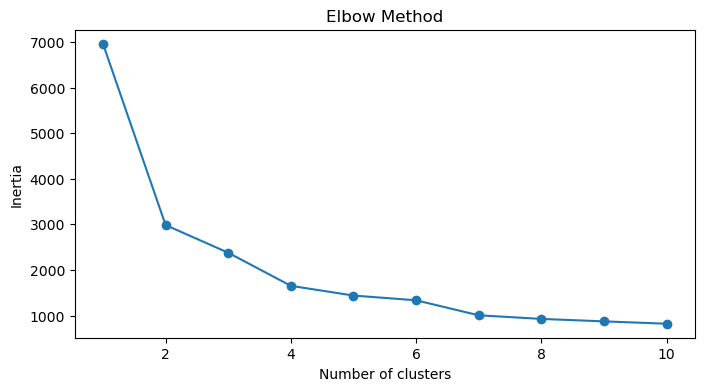

In [97]:
# Determine the number of clusters (Elbow Method)

# Assuming df_scaled is your scaled dataset
inertia = []
for k in range(1, 11):  # Trying different numbers of clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    inertia.append(kmeans.inertia_)  # Inertia: Sum of distances of samples to their closest cluster center

# Plotting the elbow graph to fdf_scaledind the optimal number of clusters
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [98]:
# Assume optimal clusters from Elbow Method
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(clustering_data)

In [101]:
pubg_df_without_outliers['Cluster'] = clusters
# print(clean_numeric_df_scaled.groupby('Cluster').mean()) 

/home/buddha-thapa-magar/anaconda3/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


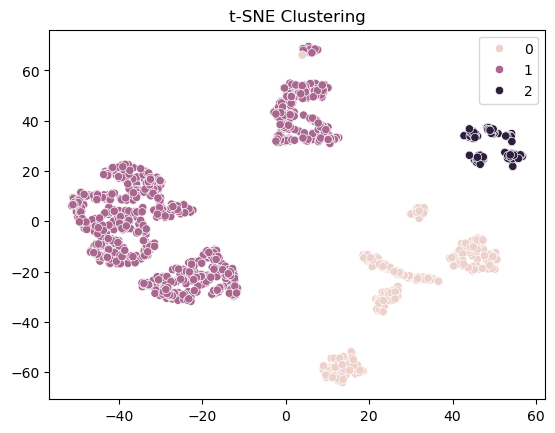

In [103]:
# t-SNE for visualization in a 2D space
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=3000)
df_tsne = tsne.fit_transform(clustering_data)
sns.scatterplot(x=df_tsne[:,0], y=df_tsne[:,1], hue=clusters)
plt.title('t-SNE Clustering')
plt.show()

In [114]:
# Fit KMeans with optimal K
optimal_k = 3  # You can set this based on the elbow method or any other criteria
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(clustering_data)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate SSE for each cluster
sse_per_cluster = []
for i in range(optimal_k):
    cluster_points = clustering_data[cluster_labels == i]
    cluster_sse = np.sum((cluster_points - centroids[i]) ** 2)
    sse_per_cluster.append(cluster_sse)

# Create a DataFrame to store size and SSE for each cluster
cluster_info = pd.DataFrame({
    'Cluster': range(optimal_k),
    'Size': [np.sum(cluster_labels == i) for i in range(optimal_k)],
    'SSE': sse_per_cluster
})

print(cluster_info)

   Cluster  Size                                                SSE
0        0   491  Killstreaks           155.882837
Kills        ...
1        1   651  Killstreaks             9.446077
Kills        ...
2        2   250  Killstreaks           4.930381e-29
Kills      ...


/home/buddha-thapa-magar/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [115]:
from sklearn.metrics import silhouette_score

In [116]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(clustering_data, clusters)
print("The average silhouette score for the clusters is:", silhouette_avg)

The average silhouette score for the clusters is: 0.5380383261745784


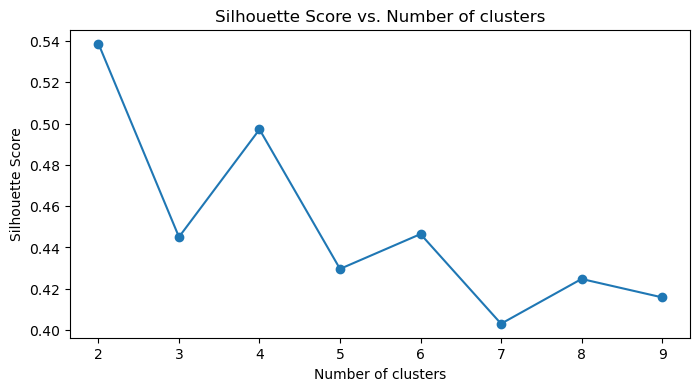

In [118]:
silhouette_scores = []
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    labels = kmeans.fit_predict(clustering_data)
    score = silhouette_score(clustering_data, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of clusters')
plt.show()

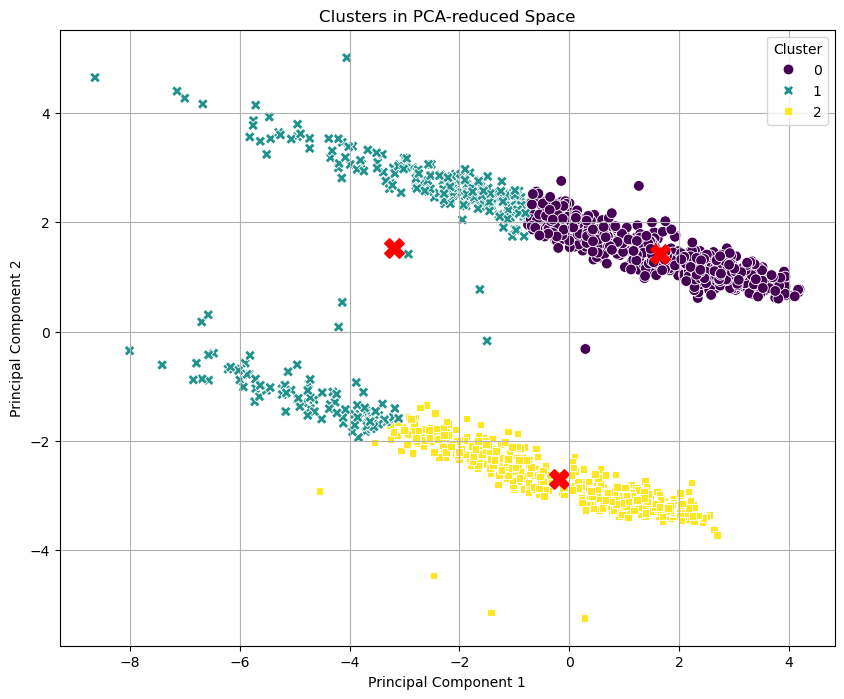

In [119]:
pca2 = PCA(n_components=2)
# Get the cluster labels for each point
pca_2_df = pca2.fit_transform(clean_numeric_df_scaled)

kmeans_model = KMeans(n_clusters=3)  # Adjust the number of clusters if needed
kmeans_model.fit(pca_2_df)

# Get the cluster centers
cluster_centers = kmeans_model.cluster_centers_

# Create a DataFrame for the cluster centers
# Make sure the number of columns matches the number of PCA components
center_df = pd.DataFrame(cluster_centers, columns=['PC1', 'PC2'])


labels = kmeans_model.labels_

# Plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_2_df[:, 0], y=pca_2_df[:, 1], hue=labels, palette='viridis', style=labels, s=60)
plt.scatter(center_df['PC1'], center_df['PC2'], s=200, c='red', marker='X')  # Plot cluster centers
plt.title('Clusters in PCA-reduced Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.grid(True)
plt.show()